In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())

data_dir = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Dataset'
data_dir_resized = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Resize '

Name = os.listdir(data_dir)
print(Name)
print(len(Name))
NameLabels = ['Control', 'Stroke']
print(NameLabels)
print(len(NameLabels))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project
['.DS_Store', 'Stroke', 'Control']
3
['Control', 'Stroke']
2


In [3]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input = tf.keras.applications.vgg19.preprocess_input

# Rescaling the input image
train_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.


Found 401 images belonging to 2 classes.


In [4]:
for image, label in train_generator:
      print(type(image))
      print(label)
      print(label[0])   # one-hot label
      print(NameLabels[np.argmax(label[0])])  # text label
      # print(NameLabels[np.argmax(label)])  # text label
      print(image[0].shape)
      break

<class 'numpy.ndarray'>
[1. 1. 1. 0. 1. 1.]
1.0
Control
(255, 255, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.031611755].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.59239614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.59239614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.12965098].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.59239614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.0629843].


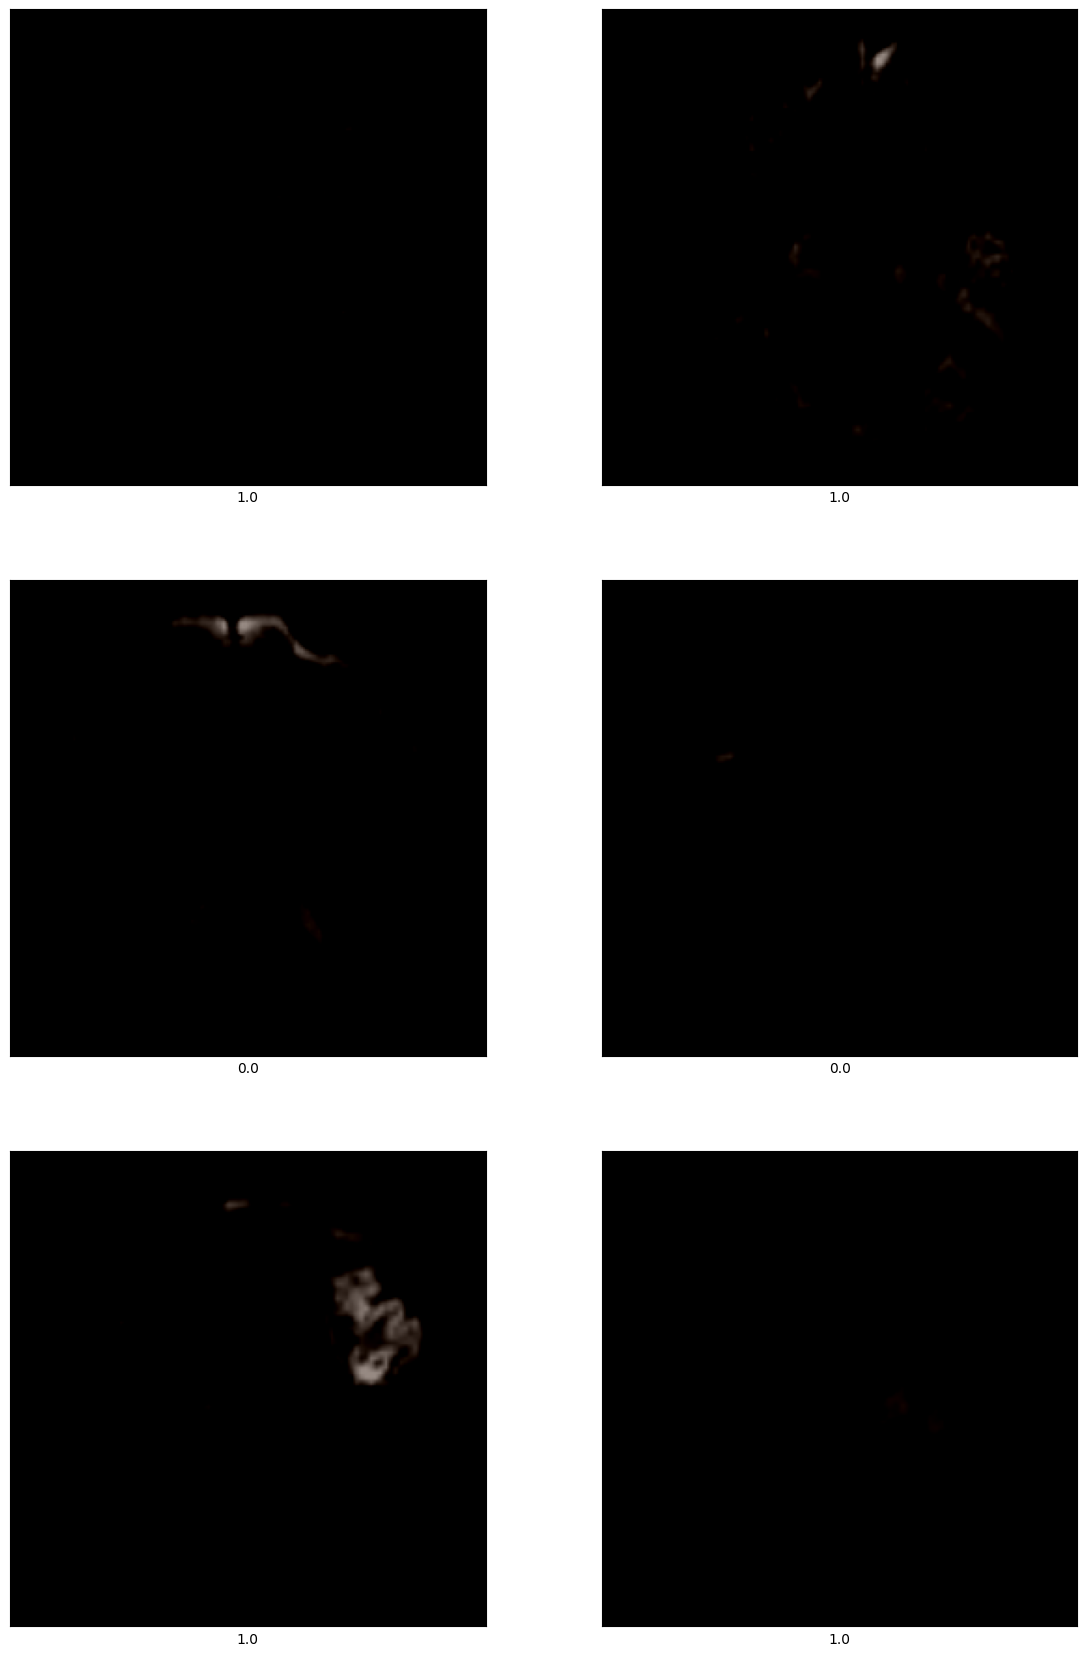

In [5]:
# browse some images
f = plt.figure(figsize=(14, 21))
for p in range(6):
    for image, label in train_generator:
        f.add_subplot(3,2,p+1)
        plt.imshow(image[p])
        # plt.title(NameLabels[np.argmax(label[p])])
        plt.xlabel(label[p], fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        break
plt.show()

# MODEL 0

simple CNN

In [6]:
model = tf.keras.Sequential()
# layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 224x224 with three layers for colors
model.add(layers.MaxPooling2D((2, 2)))
# layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
# layer 4
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
# layer 5
model.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.build()

In [8]:
# model.summary()

In [9]:
model.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 101s 296ms/step - binary_accuracy: 0.6093 - loss: 167.1974 - val_binary_accuracy: 0.5012 - val_loss: 0.7929
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 102s 303ms/step - binary_accuracy: 0.5152 - loss: 0.6933 - val_binary_accuracy: 0.5012 - val_loss: 0.7440
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 89s 265ms/step - binary_accuracy: 0.5130 - loss: 0.6935 - val_binary_accuracy: 0.5012 - val_loss: 0.7621
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 106s 314ms/step - binary_accuracy: 0.4922 - loss: 0.6940 - val_binary_accuracy: 0.5012 - val_loss: 0.7487
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 96s 286ms/step - binary_accuracy: 0.4852 - loss: 0.6939 - val_binary_accuracy: 0.5012 - val_loss: 0.7462
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 108s 320ms/step - binary_accuracy: 0.5011 - loss: 0.6938 - val_binary_accuracy: 0.5012 - val_loss: 0.7468
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 107s 318ms/step - binary_accuracy: 0.4689 - loss: 0.6939 - val_binary_accuracy: 0.5012 - val_lo

In [10]:
def plot_loss_accuracy(history, title):
  fig = plt.figure(figsize=(13, 6))
  plt.suptitle(f"Binary classifier, stroke detection based on  MRI images\n\n {title}", fontsize=14)
  ax1 = fig.add_subplot(1,2,1)
  plt.plot(history.history['binary_accuracy'], 'r', label='Training accuracy')
  plt.plot(history.history['val_binary_accuracy'], 'purple', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend(fontsize=12, loc=4)
  plt.grid(True, alpha=0.5)

  ax2 = fig.add_subplot(1,2,2)
  plt.plot(history.history['loss'], 'g', label='Training loss')
  plt.plot(history.history['val_loss'], 'b', label='Validation loss')
  plt.title('Training and validation loss', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  handles, labels = plt.gca().get_legend_handles_labels()
  order = [1, 0]
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12, loc=4) 
  plt.legend(fontsize=14, loc=7)
  plt.grid(True, alpha=0.4)
  plt.tight_layout()
  plt.show()

In [1]:
print(len(model.layers))

NameError: name 'model' is not defined

In [11]:
max(history.history['val_binary_accuracy'])

0.5012468695640564

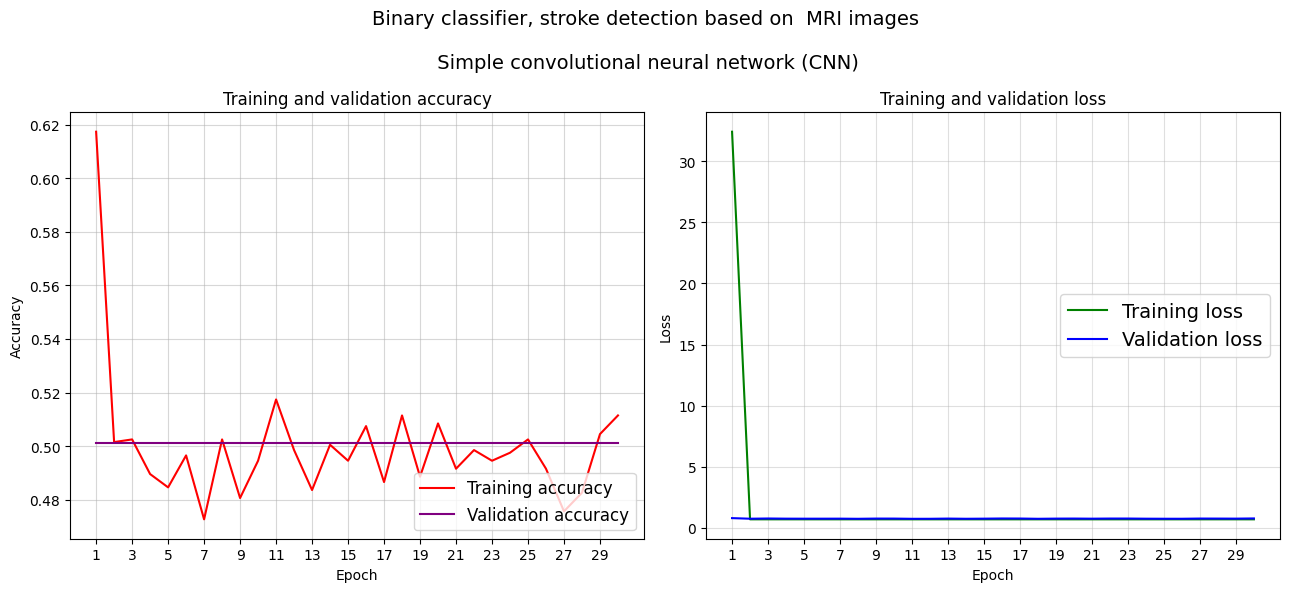

In [12]:
plot_loss_accuracy(history, "Simple convolutional neural network (CNN)")

random

# MODEL 1

#### updated simple CNN - model1

the updated simple CNN model is bigger, has an extra layer, more neurons, L2 regularization and dropout added and smaller learning rate

In [13]:
model1 = tf.keras.Sequential()
# layer 1
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (255, 255, 3))) 
model1.add(layers.MaxPooling2D((2, 2)))
# layer 2
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 3
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 4
model1.add(layers.Conv2D(512, (3, 3), activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
# layer 5
model1.add(layers.Dense(1024, activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(Dropout(0.5))
# layer 6
model1.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# model1.summary()

In [15]:
model1.compile(
    optimizer = RMSprop(learning_rate=1e-5), # 0.00001
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history1 = model1.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 584s 2s/step - binary_accuracy: 0.5135 - loss: 22.3475 - val_binary_accuracy: 0.4988 - val_loss: 17.1812
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 516s 2s/step - binary_accuracy: 0.5901 - loss: 15.6204 - val_binary_accuracy: 0.4988 - val_loss: 15.3163
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - binary_accuracy: 0.6461 - loss: 11.0044 - val_binary_accuracy: 0.4988 - val_loss: 14.5724
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - binary_accuracy: 0.6727 - loss: 7.8639 - val_binary_accuracy: 0.4988 - val_loss: 14.9485
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 319s 951ms/step - binary_accuracy: 0.6849 - loss: 5.7014 - val_binary_accuracy: 0.4988 - val_loss: 15.2135
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 322s 960ms/step - binary_accuracy: 0.6988 - loss: 4.1887 - val_binary_accuracy: 0.4988 - val_loss: 13.4248
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 321s 957ms/step - binary_accuracy: 0.7203 - loss: 3.1531 - val_binary_accuracy: 0.4988 

In [16]:
max(history1.history['val_binary_accuracy'])

0.8079800605773926

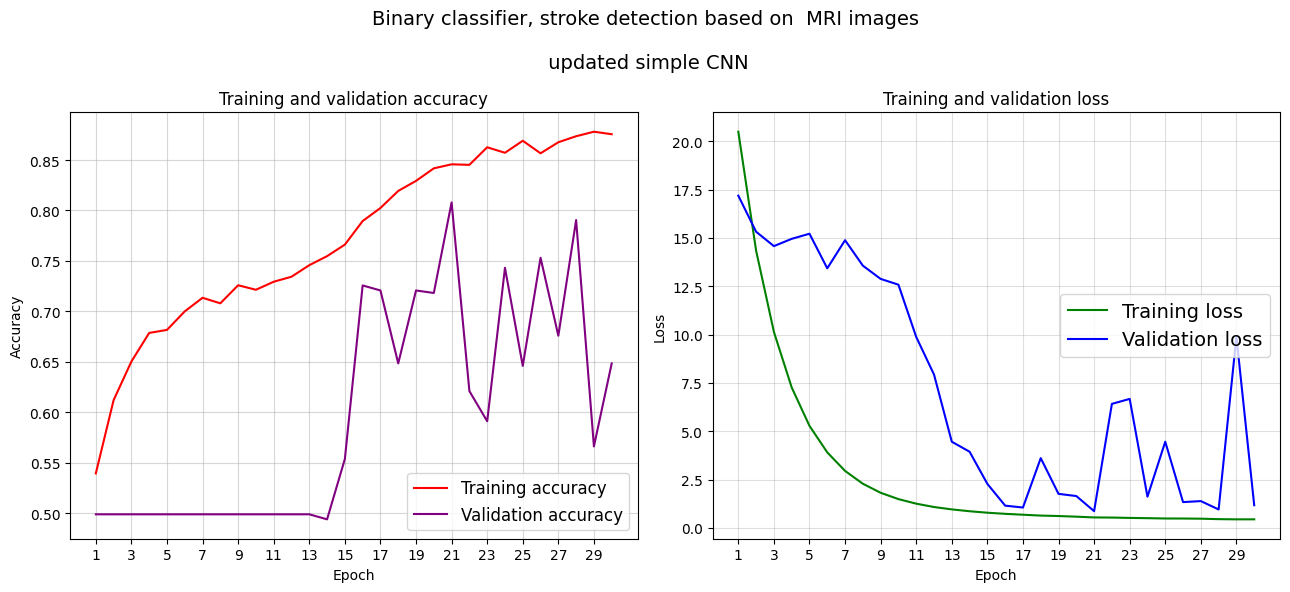

In [17]:
plot_loss_accuracy(history1, "updated simple CNN")

model1 did not overfit as fast as the original model, but the improvement was minor

# PRETRAINED MODELS

I explored four different pretrained models - VGG19, ResNet50, InceptionV3, EfficientNetB0 - and created two versions of each, while keepin the rest of the parameters same:
1. with all layers frozen and 
1. with 3 unfrozen layers

# MODEL 2

#### pretrained model VGG19 (Visual Geometry Group), all layers frozen, model2

In [18]:
# instantiating VGG19 convolutional base
pre_trained_model2 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model2.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model2.summary()

In [19]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model2.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [20]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [21]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(pre_trained_model2.input, outputs) 

# Print the model summary
# model2.summary()

In [22]:
model2.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model2.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history2 = model2.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 762s 2s/step - binary_accuracy: 0.5434 - loss: 1.0337 - val_binary_accuracy: 0.5362 - val_loss: 0.7232
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 742s 2s/step - binary_accuracy: 0.6037 - loss: 0.6611 - val_binary_accuracy: 0.5761 - val_loss: 0.7126
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 742s 2s/step - binary_accuracy: 0.6815 - loss: 0.6161 - val_binary_accuracy: 0.5786 - val_loss: 0.7231
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - binary_accuracy: 0.6456 - loss: 0.6288 - val_binary_accuracy: 0.6309 - val_loss: 0.6924
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - binary_accuracy: 0.6767 - loss: 0.6043 - val_binary_accuracy: 0.6060 - val_loss: 0.7039
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - binary_accuracy: 0.6748 - loss: 0.5990 - val_binary_accuracy: 0.6833 - val_loss: 0.6156
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 706s 2s/step - binary_accuracy: 0.6835 - loss: 0.5802 - val_binary_accuracy: 0.5661 - val_loss: 0.6656
Epoch 8/30

In [23]:
max(history2.history['val_binary_accuracy'])

0.8279301524162292

In [24]:
#the best model2
best_model2 = keras.models.load_model("model2.keras") 
val_loss, val_binary_acc = best_model2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - binary_accuracy: 0.8228 - loss: 0.4171
Validation accuracy: 0.798


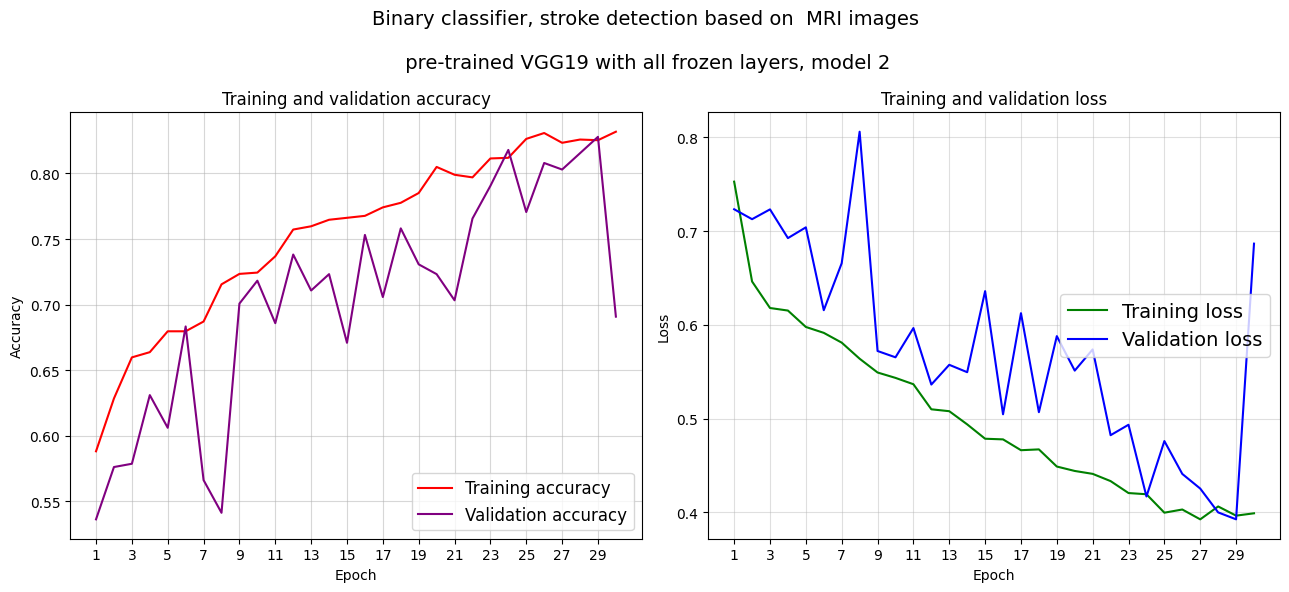

In [25]:
plot_loss_accuracy(history2, "pre-trained VGG19 with all frozen layers, model 2")

outcome of model2 was worse than the baseline

# MODEL 3

#### pretrained model VGG19 (Visual Geometry Group), 16 frozen and 3 unfrozen layers, model3

In [26]:
# instantiating VGG19 convolutional base
pre_trained_model3 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the first 16 layers, leave last 3 trainable
pre_trained_model3.trainable = True
for layer in pre_trained_model3.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model3.summary()

In [27]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model3.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [28]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [29]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model3 = Model(pre_trained_model3.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model3.summary()

In [30]:
model3.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model3.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history3 = model3.fit(
    train_generator,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - binary_accuracy: 0.6069 - loss: 0.6588 - val_binary_accuracy: 0.5686 - val_loss: 0.7066
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 775s 2s/step - binary_accuracy: 0.6784 - loss: 0.5945 - val_binary_accuracy: 0.6334 - val_loss: 0.6349
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 709s 2s/step - binary_accuracy: 0.6962 - loss: 0.5468 - val_binary_accuracy: 0.7132 - val_loss: 0.5952
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 701s 2s/step - binary_accuracy: 0.7376 - loss: 0.5107 - val_binary_accuracy: 0.7257 - val_loss: 0.5625
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - binary_accuracy: 0.7931 - loss: 0.4526 - val_binary_accuracy: 0.7481 - val_loss: 0.5470
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - binary_accuracy: 0.7992 - loss: 0.4473 - val_binary_accuracy: 0.7382 - val_loss: 0.5366
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 707s 2s/step - binary_accuracy: 0.8246 - loss: 0.4126 - val_binary_accuracy: 0.8055 - val_loss: 0.4672
Epoch 8/30

In [31]:
max(history3.history['val_binary_accuracy'])

0.9551122188568115

In [32]:
#the best model3
best_model3 = keras.models.load_model("model3.keras") 
val_loss, val_binary_acc = best_model3.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - binary_accuracy: 0.9597 - loss: 0.1202
Validation accuracy: 0.955


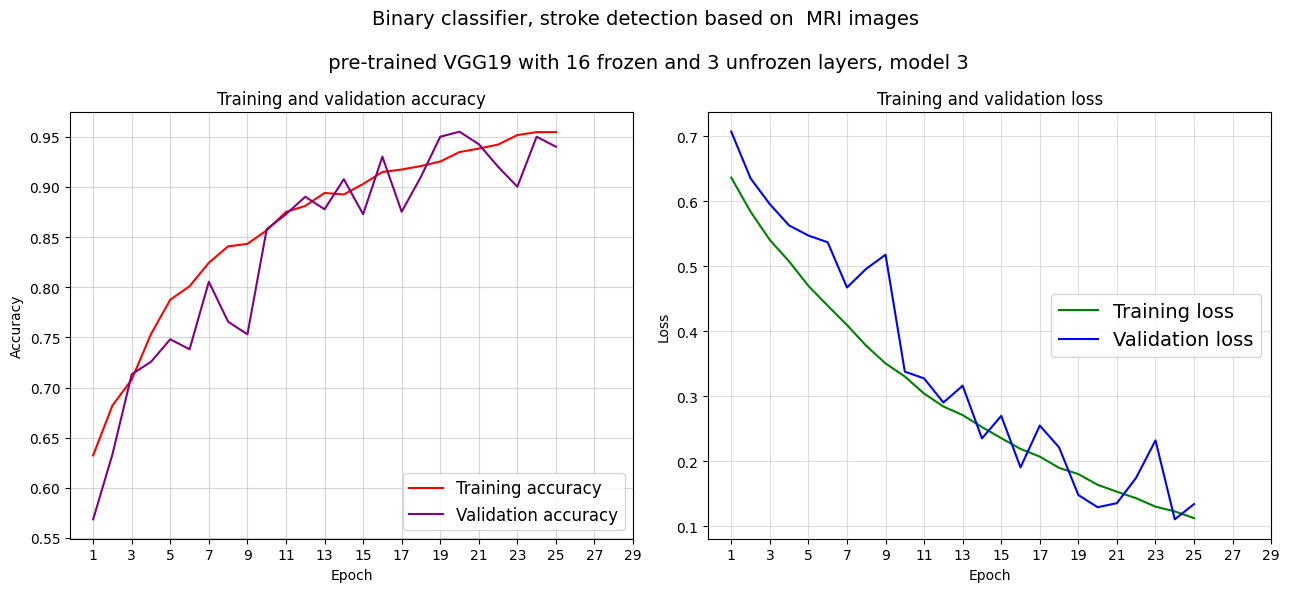

In [33]:
plot_loss_accuracy(history3, "pre-trained VGG19 with 16 frozen and 3 unfrozen layers, model 3")

model 3 outcome was a big improvement over previous models. improvement may continue if there were more epochs.

# MODEL 4

#### pretrained model: ResNet50, all frozen layers, model4

In [34]:
# instantiating ResNet50 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model4 = keras.applications.ResNet50(
    input_tensor = inputs, 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model4.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model4.summary()

In [35]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model4.get_layer('conv5_block3_out') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [36]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)  

In [37]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model4 = Model(pre_trained_model4.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model4.summary()

In [38]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input_resnet = tf.keras.applications.resnet.preprocess_input

# Rescaling the input image
train_datagen_resnet = ImageDataGenerator(preprocessing_function=preprocess_input_resnet)

validation_datagen_resnet = ImageDataGenerator(validation_split=0.2)

train_generator_resnet = train_datagen_resnet.flow_from_directory(
    data_dir_resized,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_resnet = validation_datagen_resnet.flow_from_directory(
    data_dir_resized,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [39]:
model4.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model4.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history4 = model4.fit(
    train_generator_resnet,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_resnet,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 192s 556ms/step - binary_accuracy: 0.6821 - loss: 1.4091 - val_binary_accuracy: 0.6608 - val_loss: 1.7012
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 190s 566ms/step - binary_accuracy: 0.7978 - loss: 0.4802 - val_binary_accuracy: 0.6434 - val_loss: 1.1380
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 194s 578ms/step - binary_accuracy: 0.8092 - loss: 0.4218 - val_binary_accuracy: 0.8379 - val_loss: 0.3444
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 180s 537ms/step - binary_accuracy: 0.8477 - loss: 0.3531 - val_binary_accuracy: 0.7032 - val_loss: 1.3624
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 179s 535ms/step - binary_accuracy: 0.8755 - loss: 0.3245 - val_binary_accuracy: 0.7581 - val_loss: 0.8149
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 181s 541ms/step - binary_accuracy: 0.8551 - loss: 0.3279 - val_binary_accuracy: 0.8229 - val_loss: 0.7839
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 191s 569ms/step - binary_accuracy: 0.8881 - loss: 0.2866 - val_binary_accuracy: 0.7431 - val_lo

In [40]:
max(history4.history['val_binary_accuracy'])

0.83790522813797

In [41]:
#the best model4
best_model4 = keras.models.load_model("model4.keras") 
val_loss, val_binary_acc = best_model4.evaluate(validation_generator_resnet) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 390ms/step - binary_accuracy: 0.8092 - loss: 0.3921
Validation accuracy: 0.838


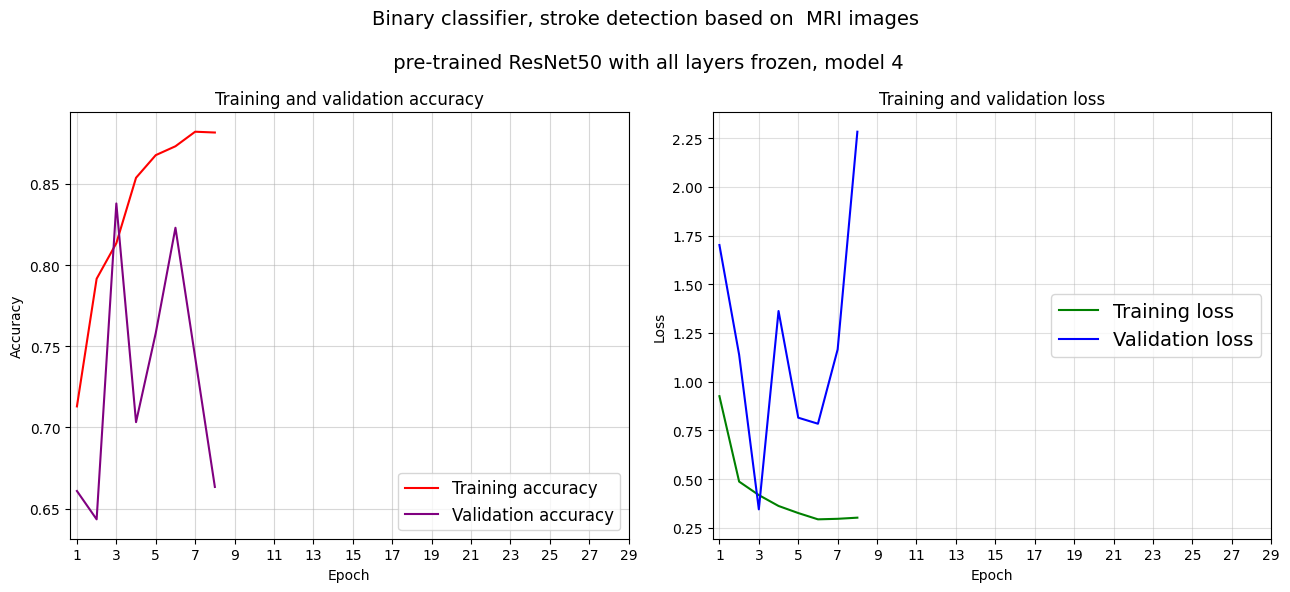

In [42]:
plot_loss_accuracy(history4, "pre-trained ResNet50 with all layers frozen, model 4")

model4 outcome was worse than baseline model0, no better than random chance

# MODEL 5

#### pretrained model: ResNet50, unfrozen layers, model5

In [43]:
# instantiating ResNet50 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model5 = keras.applications.ResNet50(
    input_tensor = inputs, 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model5.trainable = True
for layer in pre_trained_model5.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model5.summary()

In [44]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model5.get_layer('conv5_block3_out')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 2048)


In [45]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)

# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)  

In [46]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model5 = Model(pre_trained_model5.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model5.summary()

In [47]:
model5.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model5.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history5 = model5.fit(
    train_generator_resnet,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_resnet,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 208s 606ms/step - binary_accuracy: 0.6776 - loss: 0.6417 - val_binary_accuracy: 0.7132 - val_loss: 0.5894
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 203s 605ms/step - binary_accuracy: 0.7898 - loss: 0.4532 - val_binary_accuracy: 0.6284 - val_loss: 0.9024
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 195s 581ms/step - binary_accuracy: 0.8340 - loss: 0.3875 - val_binary_accuracy: 0.6933 - val_loss: 0.7282
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 194s 580ms/step - binary_accuracy: 0.8681 - loss: 0.3222 - val_binary_accuracy: 0.7431 - val_loss: 0.6244
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 194s 578ms/step - binary_accuracy: 0.8626 - loss: 0.3358 - val_binary_accuracy: 0.7581 - val_loss: 0.5753
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 202s 604ms/step - binary_accuracy: 0.8998 - loss: 0.2724 - val_binary_accuracy: 0.7980 - val_loss: 0.5437
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 206s 616ms/step - binary_accuracy: 0.9001 - loss: 0.2526 - val_binary_accuracy: 0.7930 - val_lo

In [48]:
max(history5.history['val_binary_accuracy'])

0.7980049848556519

In [49]:
#the best model5
best_model5 = keras.models.load_model("model5.keras") 
val_loss, val_binary_acc = best_model5.evaluate(validation_generator_resnet) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 34s 433ms/step - binary_accuracy: 0.8067 - loss: 0.4767
Validation accuracy: 0.798


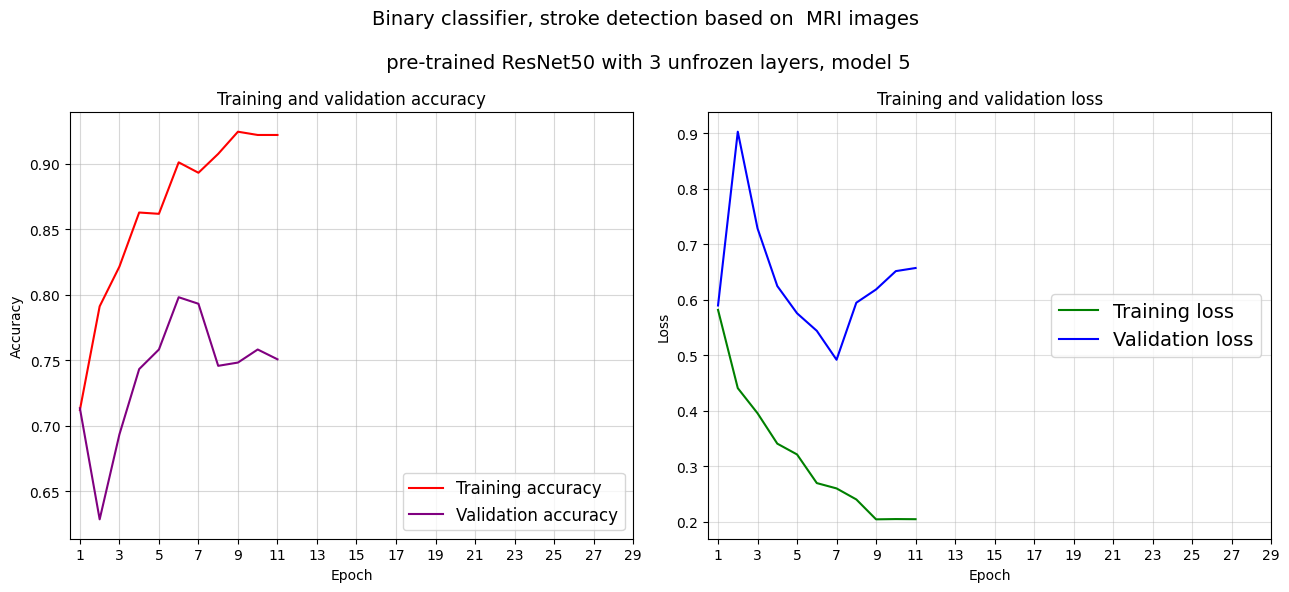

In [50]:
plot_loss_accuracy(history5, "pre-trained ResNet50 with 3 unfrozen layers, model 5")

model 5 performed worse than baseline

# MODEL 6

#### pretrained model: InceptionV3, all frozen layers, model6

In [51]:
# instantiating InceptionV3 convolutional base
pre_trained_model6 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model6.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model6.summary()

In [52]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model6.get_layer('mixed10')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [53]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [54]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model6 = Model(pre_trained_model6.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model6.summary()

In [55]:
# Inceptionv3 preproces_input will scale input pixels between -1 and 1, 

# preprocess_input_inc = tf.keras.applications.inception_v3.preprocess_input

# # Rescaling the input image and Data Augmentation
# train_datagen_inc = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input_inc)

# validation_datagen_inc = ImageDataGenerator(rescale = 1./255, validation_split=0.2)


# train_generator_inc = train_datagen_inc.flow_from_directory(
#     data_dir,
#     target_size=(255,255),
#     class_mode='binary',
#     batch_size=6,
#     subset = "training")

# validation_generator_inc = validation_datagen_inc.flow_from_directory(
#     data_dir,
#     target_size=(255,255),
#     class_mode='binary',
#     batch_size=6,
#     subset = "validation")

In [56]:
model6.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model6.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history6 = model6.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 207s 599ms/step - binary_accuracy: 0.6375 - loss: 5.4985 - val_binary_accuracy: 0.7581 - val_loss: 0.5208
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 193s 573ms/step - binary_accuracy: 0.7886 - loss: 0.4820 - val_binary_accuracy: 0.8529 - val_loss: 0.3887
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 202s 603ms/step - binary_accuracy: 0.8542 - loss: 0.3717 - val_binary_accuracy: 0.8603 - val_loss: 0.3472
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 195s 580ms/step - binary_accuracy: 0.8762 - loss: 0.3133 - val_binary_accuracy: 0.8653 - val_loss: 0.3534
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 205s 613ms/step - binary_accuracy: 0.9253 - loss: 0.2582 - val_binary_accuracy: 0.9202 - val_loss: 0.2442
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 196s 583ms/step - binary_accuracy: 0.9395 - loss: 0.1731 - val_binary_accuracy: 0.8529 - val_loss: 0.5404
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 188s 562ms/step - binary_accuracy: 0.9394 - loss: 0.1509 - val_binary_accuracy: 0.8279 - val_lo

In [57]:
max(history6.history['val_binary_accuracy'])

0.9201995134353638

In [58]:
#the best model6
best_model6 = keras.models.load_model("model6.keras") 
val_loss, val_binary_acc = best_model6.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 30s 380ms/step - binary_accuracy: 0.9154 - loss: 0.2671
Validation accuracy: 0.920


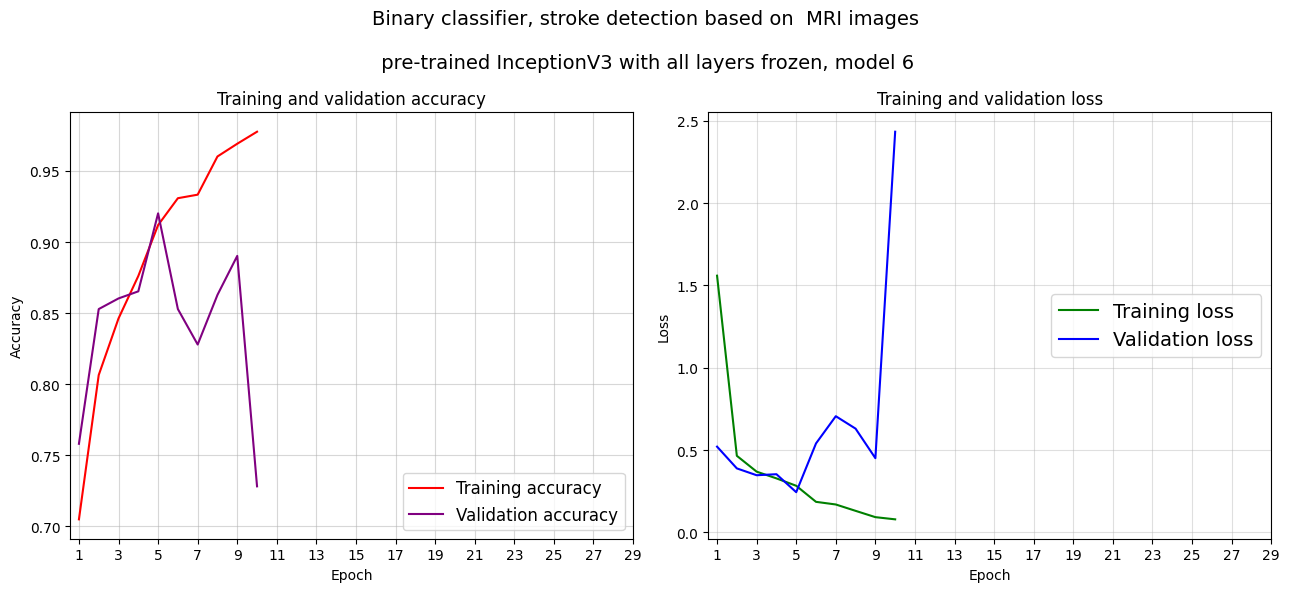

In [59]:
plot_loss_accuracy(history6, "pre-trained InceptionV3 with all layers frozen, model 6")

model 6 is an improvement over the baseline, achieving around 85% accuracy

# MODEL 7

#### pretrained model: InceptionV3, 3 unfrozen layers, model7

In [60]:
# instantiating InceptionV3 convolutional base
pre_trained_model7 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# # Freeze the weights, leave last 3 trainable
# pre_trained_model7.trainable = True
# for layer in pre_trained_model7.layers[:-4]:  # loop through all but the last three layers
#     layer.trainable = False  # make them not trainable

# Freeze the weights, leave 25 trainable, but not Batchnomalization
# pre_trained_model7.trainable = True
for layer in pre_trained_model7.layers[-13:]:  # loop through all but the last 25 layers
    if not isinstance(layer,layers.BatchNormalization):
        layer.trainable = True  # make them trainable

# printing out the summary of the pretrained model
# pre_trained_model7.summary()

In [61]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model7.get_layer('mixed10') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [62]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [63]:
# Add a final sigmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model7 = Model(pre_trained_model7.input, outputs) 

# Print the model summary. See your dense network connected at the end.
# model7.summary()

In [87]:
model7.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model7.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history7 = model7.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


335/335 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - binary_accuracy: 0.9525 - loss: 0.1350 - val_binary_accuracy: 0.5012 - val_loss: 1.8702
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 534s 2s/step - binary_accuracy: 0.9580 - loss: 0.1073 - val_binary_accuracy: 0.5012 - val_loss: 2.2134
Epoch 3/30
267/335 ━━━━━━━━━━━━━━━━━━━━ 1:45 2s/step - binary_accuracy: 0.9707 - loss: 0.0862

: 

In [65]:
max(history7.history['val_binary_accuracy'])

0.5810473561286926

In [66]:
#the best model7
best_model7 = keras.models.load_model("model7.keras") 
val_loss, val_binary_acc = best_model7.evaluate(validation_generator) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 197ms/step - binary_accuracy: 0.5891 - loss: 0.6626
Validation accuracy: 0.581


In [67]:
max(history7.history['val_binary_accuracy'])

0.5810473561286926

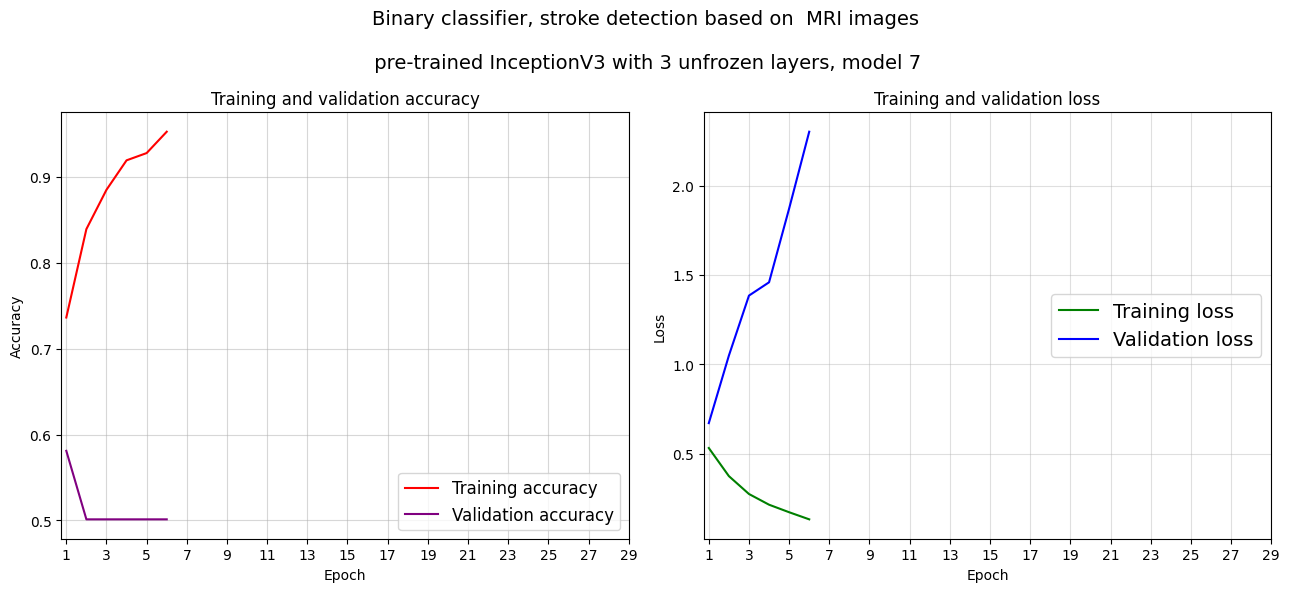

In [68]:
plot_loss_accuracy(history7, "pre-trained InceptionV3 with 3 unfrozen layers, model 7")

model7 is very similar to model 6, improvement over baseline. training last 3 layers does not seem to add

# MODEL 8

#### pretrained model: EfficientNetB0, all frozen layers, model8

In [69]:
# instantiating EfficientNetB0 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model8 = keras.applications.EfficientNetB0(
    # input_shape = (224, 224, 3), 
    input_tensor = inputs,
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model8.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model8.summary()

In [70]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model8.get_layer('top_activation')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [71]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)

# # Add a dropout rate of 0.2
x = layers.Dropout(0.2, name="top_dropout")(x)  

In [72]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid', name="pred")(x)           

# Append the dense network to the base model
model8 = Model(pre_trained_model8.input, outputs, name="EfficientNetB0") 

# Print the model summary. See your dense network connected at the end.
# model8.summary()

In [73]:
# from PIL import Image                                              
# import os, sys                       

# path = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Resize /Stroke/'
# dirs = os.listdir( path )                                      

# def resize(width, height):
# 	for item in dirs:
# 		if item == '.DS_Store':
# 			continue
# 		if os.path.isfile(path + item):
# 			img = Image.open(path + item)
# 			new_image = img.resize((width, height))
# 			new_file_name = 'resized-' + item
# 			new_image.save(path + new_file_name)

# resize(224, 224)

In [74]:
# EfficientNet preprocess_input is a pass-through function. 
# EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range

preprocess_input_en = tf.keras.applications.efficientnet.preprocess_input

# Rescaling the input image and Data Augmentation
train_datagen_en = ImageDataGenerator(preprocessing_function=preprocess_input_en)

validation_datagen_en = ImageDataGenerator(validation_split=0.2)

train_generator_en = train_datagen_en.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_en = validation_datagen_en.flow_from_directory(
    data_dir,
    target_size=(224,224),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.


Found 401 images belonging to 2 classes.


In [75]:
model8.compile(
    optimizer = RMSprop(learning_rate=0.01), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model8.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history8 = model8.fit(
    train_generator_en,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 62s 169ms/step - binary_accuracy: 0.6597 - loss: 1.5298 - val_binary_accuracy: 0.6085 - val_loss: 1.8204
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 55s 164ms/step - binary_accuracy: 0.7658 - loss: 0.6426 - val_binary_accuracy: 0.7681 - val_loss: 0.6011
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 55s 162ms/step - binary_accuracy: 0.7631 - loss: 0.5412 - val_binary_accuracy: 0.8703 - val_loss: 0.2940
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 55s 164ms/step - binary_accuracy: 0.8165 - loss: 0.4445 - val_binary_accuracy: 0.8504 - val_loss: 0.3336
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 55s 162ms/step - binary_accuracy: 0.8194 - loss: 0.4294 - val_binary_accuracy: 0.7830 - val_loss: 0.4473
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 55s 163ms/step - binary_accuracy: 0.8110 - loss: 0.4366 - val_binary_accuracy: 0.9227 - val_loss: 0.2124
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 55s 163ms/step - binary_accuracy: 0.8354 - loss: 0.4067 - val_binary_accuracy: 0.8853 - val_loss: 0.2

In [76]:
max(history8.history['val_binary_accuracy'])

0.9401496052742004

In [77]:
#the best model8
best_model8 = keras.models.load_model("model8.keras") 
val_loss, val_binary_acc = best_model8.evaluate(validation_generator_en) 
print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - binary_accuracy: 0.7317 - loss: 0.8171
Validation accuracy: 0.728


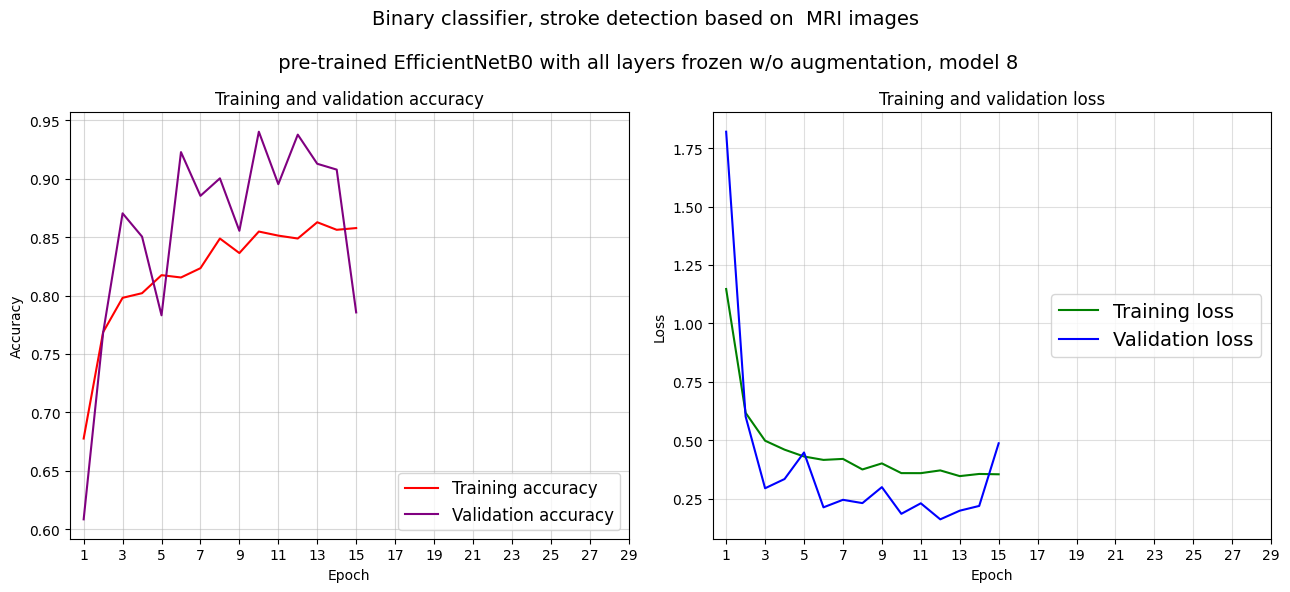

In [78]:
plot_loss_accuracy(history8, "pre-trained EfficientNetB0 with all layers frozen w/o augmentation, model 8")

# MODEL 8 OUTCOME

# MODEL 9

#### pretrained model: EfficientNetB0, 20 unfrozen layers, model9

In [79]:
# instantiating EfficientNetB0 convolutional base
inputs = layers.Input(shape=(224, 224, 3))
pre_trained_model9 = keras.applications.EfficientNetB0(
    input_tensor = inputs,
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave 20 trainable, but not Batchnomalization
# pre_trained_model9.trainable = True
for layer in pre_trained_model9.layers[-20:]:  # loop through all but the last 20 layers
    if not isinstance(layer,layers.BatchNormalization):
        layer.trainable = True  # make them trainable

# printing out the summary of the pretrained model
# pre_trained_model9.summary()

In [80]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model9.get_layer('top_activation') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1280)


In [81]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
x = layers.BatchNormalization()(x)

# # Add a dropout rate of 0.2
x = layers.Dropout(0.2, name="top_dropout")(x)  

In [82]:
# Add a final sigmmoid layer for classification
outputs = layers.Dense(1, activation='sigmoid', name="pred")(x)           

# Append the dense network to the base model
model9 = Model(pre_trained_model9.input, outputs, name="EfficientNetB0") 

# Print the model summary. See your dense network connected at the end.
# model9.summary()

In [83]:
model9.compile(
    optimizer = RMSprop(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model9.keras",
        save_best_only=True,
        monitor="val_binary_accuracy",
        mode='max')
]

history9 = model9.fit(
    train_generator_en,
    shuffle=True,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 167s 460ms/step - binary_accuracy: 0.5687 - loss: 0.7331 - val_binary_accuracy: 0.6284 - val_loss: 0.6349
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 156s 464ms/step - binary_accuracy: 0.7144 - loss: 0.5667 - val_binary_accuracy: 0.7182 - val_loss: 0.5740
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 155s 461ms/step - binary_accuracy: 0.7608 - loss: 0.4861 - val_binary_accuracy: 0.7756 - val_loss: 0.4830
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 155s 461ms/step - binary_accuracy: 0.7881 - loss: 0.4358 - val_binary_accuracy: 0.8279 - val_loss: 0.3718
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 154s 458ms/step - binary_accuracy: 0.8411 - loss: 0.3478 - val_binary_accuracy: 0.8554 - val_loss: 0.3344
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 154s 459ms/step - binary_accuracy: 0.8306 - loss: 0.4021 - val_binary_accuracy: 0.9426 - val_loss: 0.1798
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 154s 458ms/step - binary_accuracy: 0.8537 - loss: 0.3424 - val_binary_accuracy: 0.91

In [84]:
max(history9.history['val_binary_accuracy'])

0.9775561094284058

In [85]:
#the best model9
best_model9 = keras.models.load_model("model9.keras") 
val_loss, val_binary_acc = best_model9.evaluate(validation_generator_en) 
val_binary_acc
# print(f"Validation accuracy: {val_binary_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - binary_accuracy: 0.5330 - loss: 5169.9561


0.503740668296814

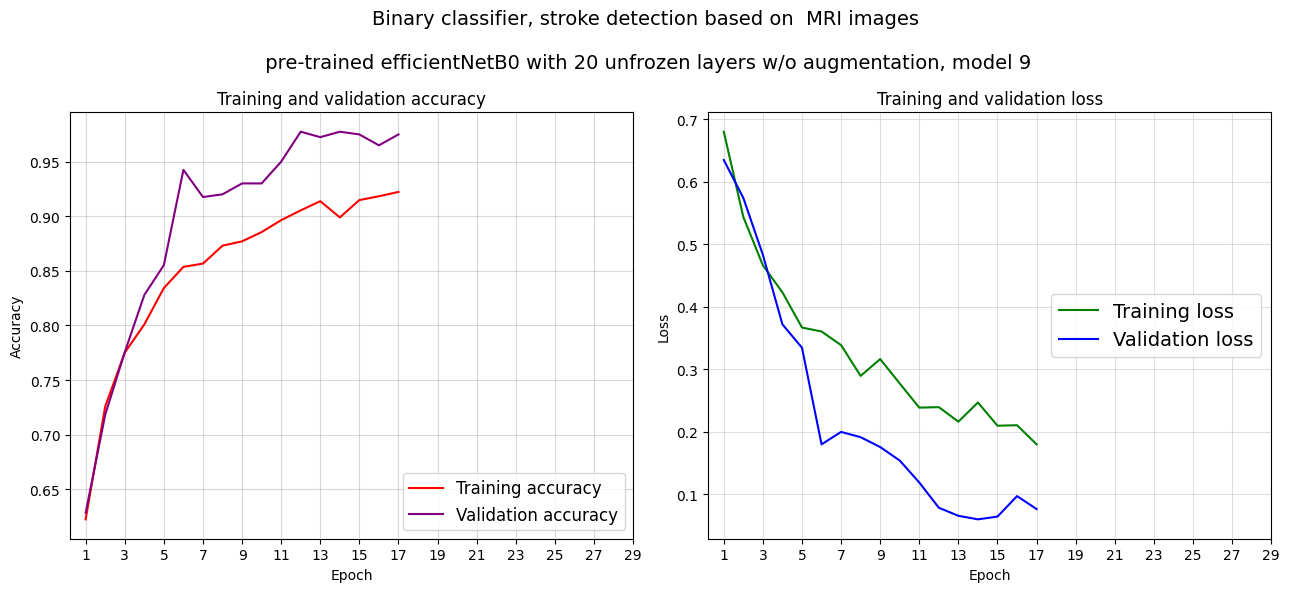

In [86]:
plot_loss_accuracy(history9, "pre-trained efficientNetB0 with 20 unfrozen layers w/o augmentation, model 9")

# MODEL 9 OUTCOME